In [203]:
import csv
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import datetime as dt

import sklearn
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from __future__ import division
%matplotlib inline

In [204]:
df = pd.read_csv("/Users/Jaebin/Downloads/crypto-markets.csv")

In [205]:
df.head(5)

slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013-05-02        1  116.38  125.60   92.28   

    close  volume        market  close_ratio  spread  
0  134.21     0.0  1.488567e+09       0.5438    3.88  
1  144.54     0.0  1.603769e+09       0.7813   13.49  
2  139.00     0.0  1.542813e+09       0.3843   12.88  
3  116.99     0.0  1.298955e+09       0.2882   32.17  
4  105.21     0.0  1.168517e+09       0.3881   33.32

In [206]:
df.tail(5)

slug symbol       name        date  ranknow      open      high  \
942292  project-x  NANOX  Project-X  2018-11-26     1727  22424.60  23049.30   
942293  project-x  NANOX  Project-X  2018-11-27     1727  20711.90  23742.10   
942294  project-x  NANOX  Project-X  2018-11-28     1727  23320.90  25235.10   
942295  project-x  NANOX  Project-X  2018-11-29     1727  24543.53  24582.47   
942296  project-x  NANOX  Project-X  2018-11-30     1727  22872.09  23086.98   

             low     close  volume  market  close_ratio   spread  
942292  17607.50  20724.80   143.0  1622.0       0.5728  5441.80  
942293  19292.90  23298.70   637.0  1823.0       0.9003  4449.20  
942294  19888.10  24442.70    49.0  1913.0       0.8518  5347.00  
942295  21457.95  22839.44   153.0  1788.0       0.4421  3124.52  
942296  19040.91  21136.72   125.0  1654.0       0.5180  4046.07

In [207]:
df.dtypes

slug            object
symbol          object
name            object
date            object
ranknow          int64
open           float64
high           float64
low            float64
close          float64
volume         float64
market         float64
close_ratio    float64
spread         float64
dtype: object

In [208]:
df['date'] = pd.to_datetime(df['date'])

In [209]:
df.dtypes

slug                   object
symbol                 object
name                   object
date           datetime64[ns]
ranknow                 int64
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
market                float64
close_ratio           float64
spread                float64
dtype: object

## Section 1: Preprocessing & EDA

In [210]:
btc = df.loc[df['name'] == "Bitcoin"].copy() # have to add .copy() to avoid hidden chaining SettingWithCopyWarning

In [211]:
btc.tail(5)

slug symbol     name       date  ranknow     open     high      low  \
2037  bitcoin    BTC  Bitcoin 2018-11-25        1  3880.78  4120.87  3585.06   
2038  bitcoin    BTC  Bitcoin 2018-11-26        1  4015.07  4107.14  3643.92   
2039  bitcoin    BTC  Bitcoin 2018-11-27        1  3765.95  3862.96  3661.01   
2040  bitcoin    BTC  Bitcoin 2018-11-28        1  3822.47  4385.90  3822.47   
2041  bitcoin    BTC  Bitcoin 2018-11-29        1  4269.00  4413.02  4145.77   

        close        volume        market  close_ratio  spread  
2037  4009.97  6.825640e+09  6.974927e+10       0.7930  535.81  
2038  3779.13  6.476900e+09  6.573929e+10       0.2919  463.22  
2039  3820.72  5.998720e+09  6.646897e+10       0.7908  201.95  
2040  4257.42  7.280280e+09  7.407256e+10       0.7720  563.43  
2041  4278.85  6.503348e+09  7.445102e+10       0.4980  267.25

In [212]:
btc['date'] = btc['date'].dt.strftime('%Y.%m.%d')
btc['year'] = pd.DatetimeIndex(btc['date']).year
btc['month'] = pd.DatetimeIndex(btc['date']).month
btc['day'] = pd.DatetimeIndex(btc['date']).day
btc['dayofyear'] = pd.DatetimeIndex(btc['date']).dayofyear
btc['weekofyear'] = pd.DatetimeIndex(btc['date']).weekofyear
btc['weekday'] = pd.DatetimeIndex(btc['date']).weekday
btc['quarter'] = pd.DatetimeIndex(btc['date']).quarter
btc['is_month_start'] = pd.DatetimeIndex(btc['date']).is_month_start
btc['is_month_end'] = pd.DatetimeIndex(btc['date']).is_month_end

<ipython-input-212-bb03079c3f7c>:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  btc['weekofyear'] = pd.DatetimeIndex(btc['date']).weekofyear


In [213]:
btc.head(5)

slug symbol     name        date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin  2013.04.28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin  2013.04.29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin  2013.04.30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin  2013.05.01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin  2013.05.02        1  116.38  125.60   92.28   

    close  volume  ...  spread  year  month  day  dayofyear  weekofyear  \
0  134.21     0.0  ...    3.88  2013      4   28        118          17   
1  144.54     0.0  ...   13.49  2013      4   29        119          18   
2  139.00     0.0  ...   12.88  2013      4   30        120          18   
3  116.99     0.0  ...   32.17  2013      5    1        121          18   
4  105.21     0.0  ...   33.32  2013      5    2        122          18   

   weekday  quarter  is_month_start  is_month_end  
0        6        2           False         False  
1        0        2           False         False  
2        1        2           False          True  
3        2        2            True         False  
4        3        2           False         False  

[5 rows x 22 columns]

In [214]:
btc = btc.drop('date', axis = 1) # drop date column now
btc = btc.drop(['symbol', 'slug'], axis = 1) # drop symbol and slug columns

In [215]:
btc.isnull().sum()
# no missing values

name              0
ranknow           0
open              0
high              0
low               0
close             0
volume            0
market            0
close_ratio       0
spread            0
year              0
month             0
day               0
dayofyear         0
weekofyear        0
weekday           0
quarter           0
is_month_start    0
is_month_end      0
dtype: int64

In [216]:
# getting IQR to check for outliers
Q1 = btc.quantile(0.25)
Q3 = btc.quantile(0.75)
IQR = Q3 - Q1

In [217]:
btc_outliers_q1 = btc[["ranknow", "open", "high", "low", "close", "volume", "market", "close_ratio", "spread"]] < Q1-1.5*IQR
btc_outliers_q3 = btc[["ranknow", "open", "high", "low", "close", "volume", "market", "close_ratio", "spread"]] > Q3+1.5*IQR
print(btc_outliers_q1.sum())
print(btc_outliers_q3.sum())

# many high outliers, but makes sense considering it's cryptocurrency and price fluctuates ridiculously because it isn't regulated
# further analysis will be performed whether or not to discard some very extreme values

close             0
close_ratio       0
day               0
dayofyear         0
high              0
is_month_end      0
is_month_start    0
low               0
market            0
month             0
open              0
quarter           0
ranknow           0
spread            0
volume            0
weekday           0
weekofyear        0
year              0
dtype: int64
close             379
close_ratio         0
day                 0
dayofyear           0
high              362
is_month_end        0
is_month_start      0
low               377
market            380
month               0
open              379
quarter             0
ranknow             0
spread            286
volume            395
weekday             0
weekofyear          0
year                0
dtype: int64


In [218]:
# Found function for scatter matrix plot on Kaggle Starter Code

# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

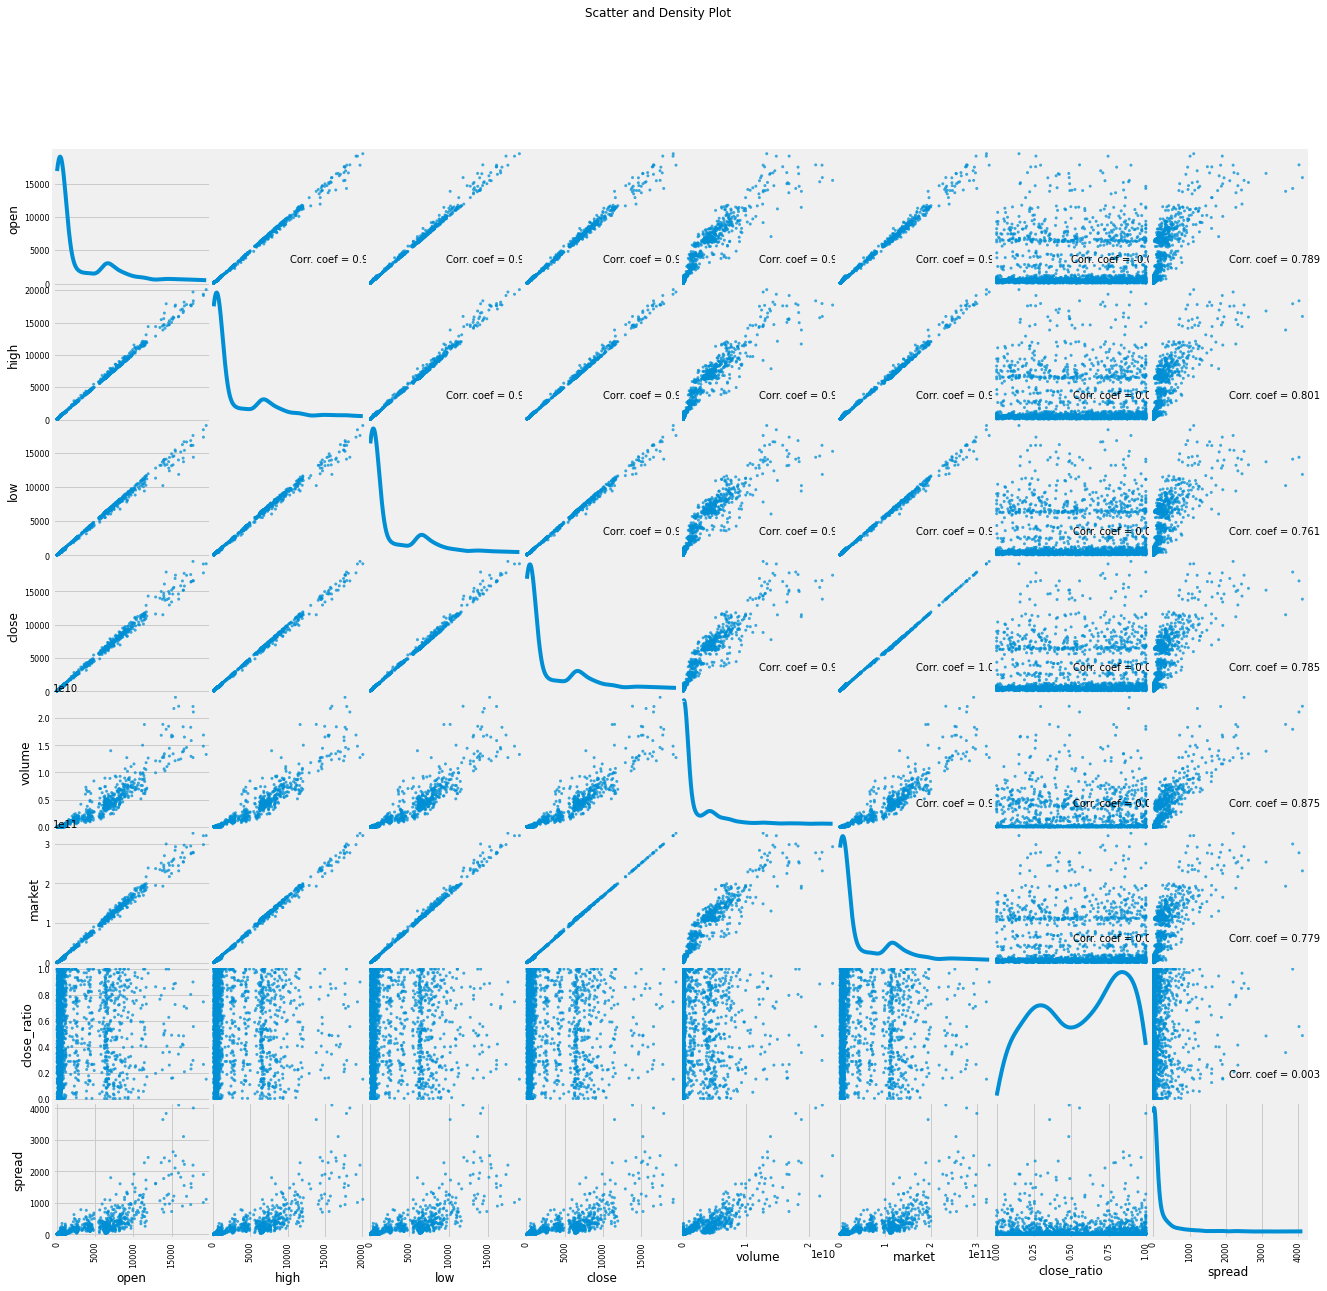

In [219]:
plotScatterMatrix(btc.iloc[:, 1:10], 20, 10)
# overall most variables are possitively correlated with one another

## Section 2: Initial Model: Decision Tree
Calculated before normalization, most likely will need to normalize at least "volume" and "market", possbily other variables

In [220]:
X = btc.drop(['close', 'name'], axis = 1)
y = btc.iloc[:, 5:6].astype(int)

# due to dependent variable "close" being float, converted to (int) for right now

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [222]:
np.random.seed(320)
clf = DecisionTreeClassifier(criterion = "gini")
clf.fit(X_train, np.ravel(y_train))

y_pred = clf.predict(X_test)
print("R-squared value is: ", metrics.r2_score(y_test, y_pred))
print("Mean squared error is: ", metrics.mean_squared_error(y_test, y_pred))
# extremely high mean squared error, need to normalize

R-squared value is:  0.9649633829692037
Mean squared error is:  413855.6479217604


## Section 3: Normalized Model
Normalize the floating point values of the data (open, high, low, close, volume, market, close_ratio, spread)
Converted close variable into categories ranging from 0-10 depending on the value 

In [223]:
from sklearn.preprocessing import MinMaxScaler

In [224]:
scaler = MinMaxScaler()
btc_scaled_val = pd.DataFrame(scaler.fit_transform(btc.iloc[:, 2:10]))
# created values containing normalized main variables (open, high, low, close, volume, market, close_ratio, spread)

In [225]:
btc_scaled = pd.concat([btc, btc_scaled_val], axis = 1)
btc_scaled = btc_scaled.drop(['open','high','low','close','volume','market','close_ratio','spread'], axis = 1)
# created new normalized dataframe

In [226]:
btc_scaled = btc_scaled.rename(columns = {0: "open", 1: "high", 2:"low", 3:"close",
                                              4:"volume",5:"market", 6:"close_ratio",7:"spread"})

In [227]:
btc_scaled.tail(5)

name  ranknow  year  month  day  dayofyear  weekofyear  weekday  \
2037  Bitcoin        1  2018     11   25        329          47        6   
2038  Bitcoin        1  2018     11   26        330          48        0   
2039  Bitcoin        1  2018     11   27        331          48        1   
2040  Bitcoin        1  2018     11   28        332          48        2   
2041  Bitcoin        1  2018     11   29        333          48        3   

      quarter  is_month_start  is_month_end      open      high       low  \
2037        4           False         False  0.196435  0.202170  0.186134   
2038        4           False         False  0.203355  0.201484  0.189247   
2039        4           False         False  0.190519  0.189283  0.190151   
2040        4           False         False  0.193431  0.215411  0.198690   
2041        4           False         False  0.216439  0.216766  0.215788   

         close    volume    market  close_ratio    spread  
2037  0.202869  0.286300  0.211746       0.7930  0.130355  
2038  0.190988  0.271672  0.199435       0.2919  0.112695  
2039  0.193129  0.251615  0.201675       0.7908  0.049131  
2040  0.215605  0.305369  0.225019       0.7720  0.137074  
2041  0.216708  0.272781  0.226181       0.4980  0.065018

In [228]:
from sklearn.preprocessing import LabelEncoder

In [229]:
btc_scaled_class = btc_scaled.copy()

label_encoder = LabelEncoder()
btc_scaled_class.close = label_encoder.fit_transform(pd.cut(btc_scaled_class['close'], 10, retbins = True)[0])
# convert 'close' variable into classes 

In [230]:
btc_scaled_class.head(5)

name  ranknow  year  month  day  dayofyear  weekofyear  weekday  \
0  Bitcoin        1  2013      4   28        118          17        6   
1  Bitcoin        1  2013      4   29        119          18        0   
2  Bitcoin        1  2013      4   30        120          18        1   
3  Bitcoin        1  2013      5    1        121          18        2   
4  Bitcoin        1  2013      5    2        122          18        3   

   quarter  is_month_start  is_month_end      open      high       low  close  \
0        2           False         False  0.003442  0.003069  0.003521      0   
1        2           False         False  0.003398  0.003644  0.003621      0   
2        2           False          True  0.003890  0.003616  0.003624      0   
3        2            True         False  0.003633  0.003264  0.002231      0   
4        2           False         False  0.002467  0.002550  0.001415      0   

   volume    market  close_ratio    spread  
0     0.0  0.002180       0.5438  0.000944  
1     0.0  0.002534       0.7813  0.003282  
2     0.0  0.002347       0.3843  0.003134  
3     0.0  0.001598       0.2882  0.007826  
4     0.0  0.001198       0.3881  0.008106

In [231]:
btc_scaled_class.tail(5)

name  ranknow  year  month  day  dayofyear  weekofyear  weekday  \
2037  Bitcoin        1  2018     11   25        329          47        6   
2038  Bitcoin        1  2018     11   26        330          48        0   
2039  Bitcoin        1  2018     11   27        331          48        1   
2040  Bitcoin        1  2018     11   28        332          48        2   
2041  Bitcoin        1  2018     11   29        333          48        3   

      quarter  is_month_start  is_month_end      open      high       low  \
2037        4           False         False  0.196435  0.202170  0.186134   
2038        4           False         False  0.203355  0.201484  0.189247   
2039        4           False         False  0.190519  0.189283  0.190151   
2040        4           False         False  0.193431  0.215411  0.198690   
2041        4           False         False  0.216439  0.216766  0.215788   

      close    volume    market  close_ratio    spread  
2037      2  0.286300  0.211746       0.7930  0.130355  
2038      1  0.271672  0.199435       0.2919  0.112695  
2039      1  0.251615  0.201675       0.7908  0.049131  
2040      2  0.305369  0.225019       0.7720  0.137074  
2041      2  0.272781  0.226181       0.4980  0.065018

In [232]:
X1 = btc_scaled_class.copy()
X1 = X1.drop(['name','close'], axis = 1)
y1 = btc_scaled_class.close

In [233]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)

In [234]:
np.random.seed(320)
clf1 = tree.DecisionTreeClassifier(criterion = "gini")
clf1.fit(X1_train, np.ravel(y1_train))

y1_pred = clf1.predict(X1_test)
print("Accuracy score: ", metrics.accuracy_score(y1_pred, y1_test))

Accuracy score:  0.9902200488997555


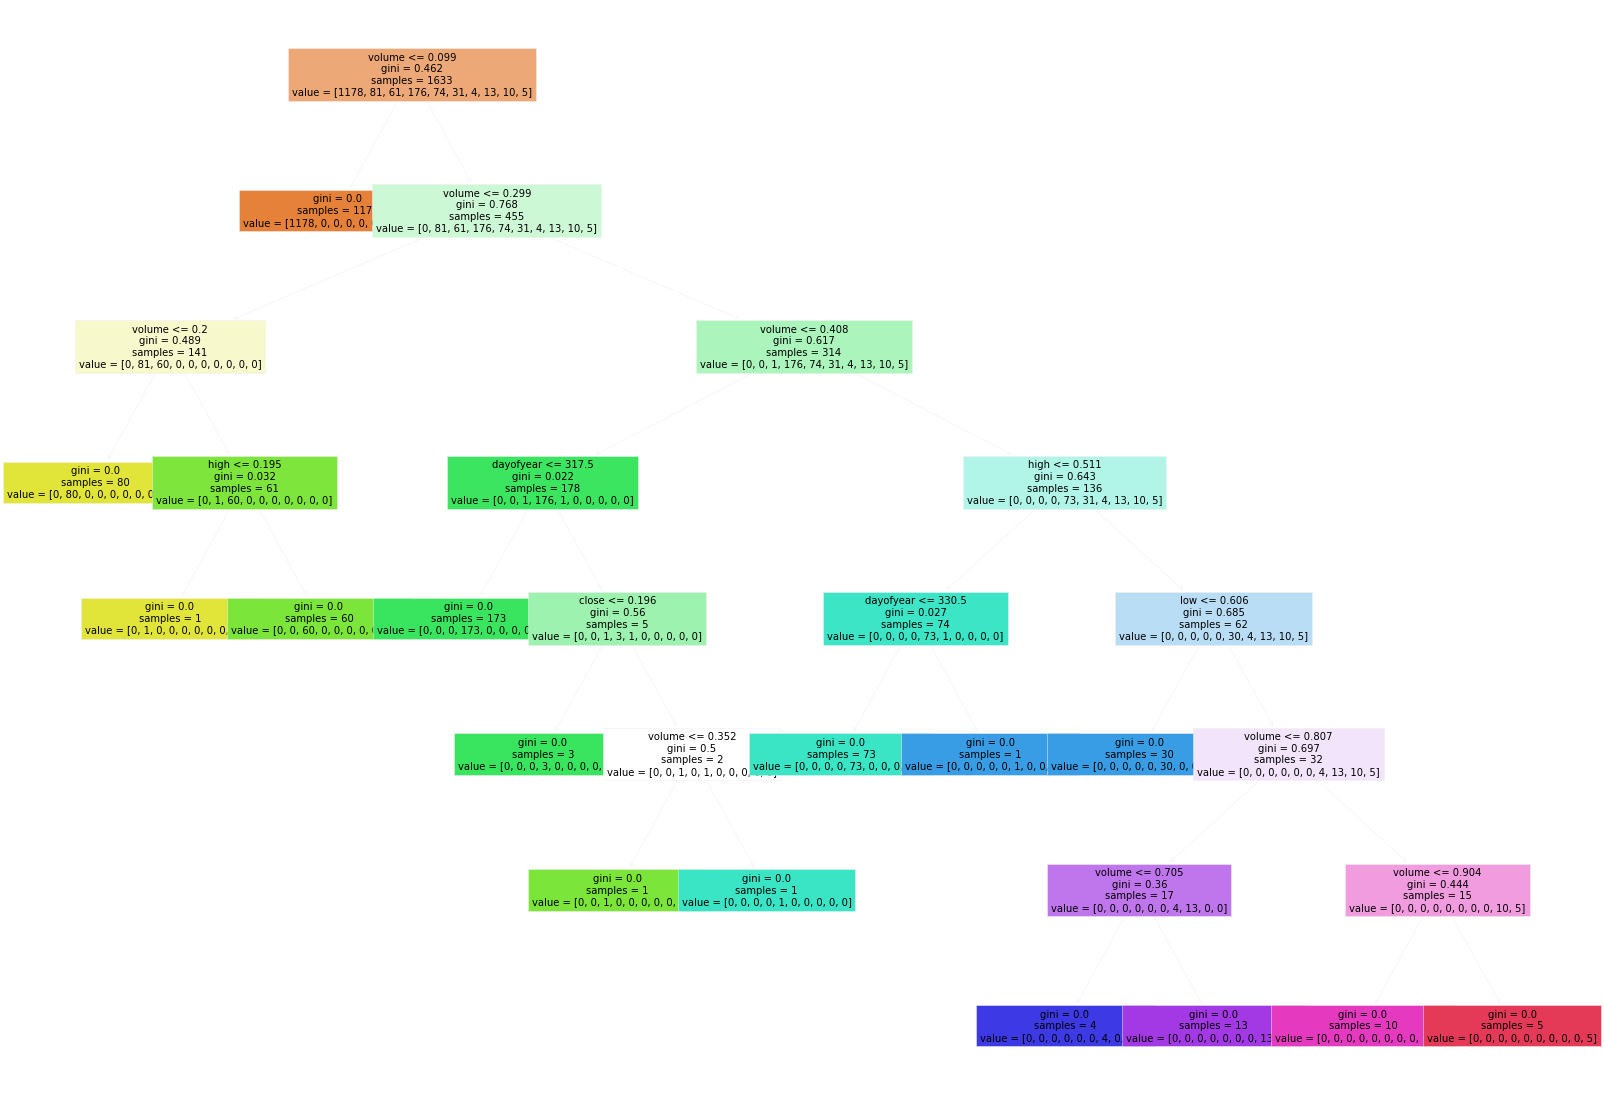

In [235]:
text_representation = tree.export_text(clf1)

fig = plt.figure(figsize = (25,20))
_ = tree.plot_tree(clf1, feature_names = btc_scaled_class.columns[1:19], filled = True, fontsize = 10)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00416
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.05967
Feature: 12, Score: 0.02676
Feature: 13, Score: 0.00239
Feature: 14, Score: 0.90702
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000


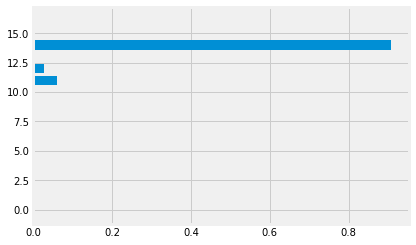

In [236]:
importance = clf1.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.barh([x for x in range(len(importance))], importance)
pyplot.show()
# market is the most the important feature by a far margin (90%)

## Section 4: Random Forest
Using the random forest algorithm to see if it predicts the classes better and find other variables other than market
Random forest places less weight on each variable because it randomly selects features to create multiple uncorrelated trees.

In [237]:
from sklearn.ensemble import RandomForestRegressor

In [238]:
# need to convert DataFrame type to Array
label = np.array(btc_scaled.close)

features = btc_scaled.drop(['close', 'name'], axis = 1) # drop dependent variable and name variable
features_list = list(features.columns) # save column names for future visualization
features = np.array(features)

In [239]:
# split into train and testing sets (random_state randomly shuffles the data, popular numbers aare 0 and 42)
X2_train, X2_test, y2_train, y2_test = train_test_split(features, label, test_size = 0.2, random_state = 42)

In [240]:
print("Training Features Shape: ", X2_train.shape)
print("Test Features Shape: ", X2_test.shape)
print("Training Label Shape: ", y2_train.shape)
print("Test Label Shape: ", y2_test.shape)

Training Features Shape:  (1633, 17)
Test Features Shape:  (409, 17)
Training Label Shape:  (1633,)
Test Label Shape:  (409,)


In [241]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Fit random forest with training sets
rf.fit(X2_train, y2_train);

In [245]:
# create prediction with training features
pred = rf.predict(X2_test)

errors = abs(pred - y2_test)
mae = round(np.mean(errors), 4)

print("Mean Absolute Error: ", mae)

Mean Absolute Error:  0.0011


In [246]:
# evaluation with MAPE and Accuracy
mape = 100 * (errors / y2_test)

accuracy = 100 - np.mean(mape)
print("Accuracy: ", accuracy)

Accuracy:  98.2645187199887


In [247]:
# for visualizing a single tree in random forest
from sklearn.tree import export_graphviz
import pydotplus
import pydot

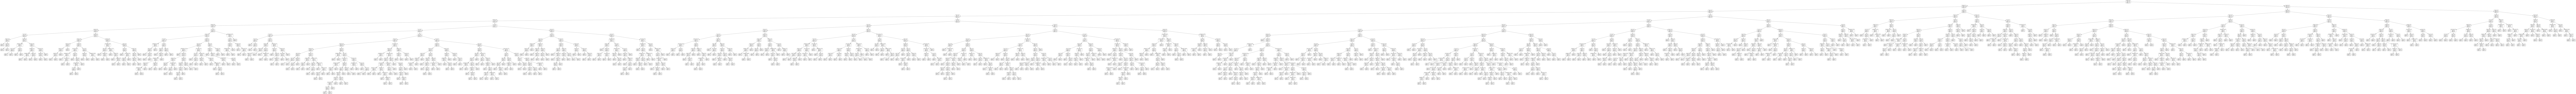

In [248]:
# pulling out one tree from random forest
rftree = rf.estimators_[5]

# export image into a dot file
export_graphviz(rftree, out_file = 'tree.dot', feature_names = features_list, rounded = True, precision = 1)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# Full tree is too large to see anything

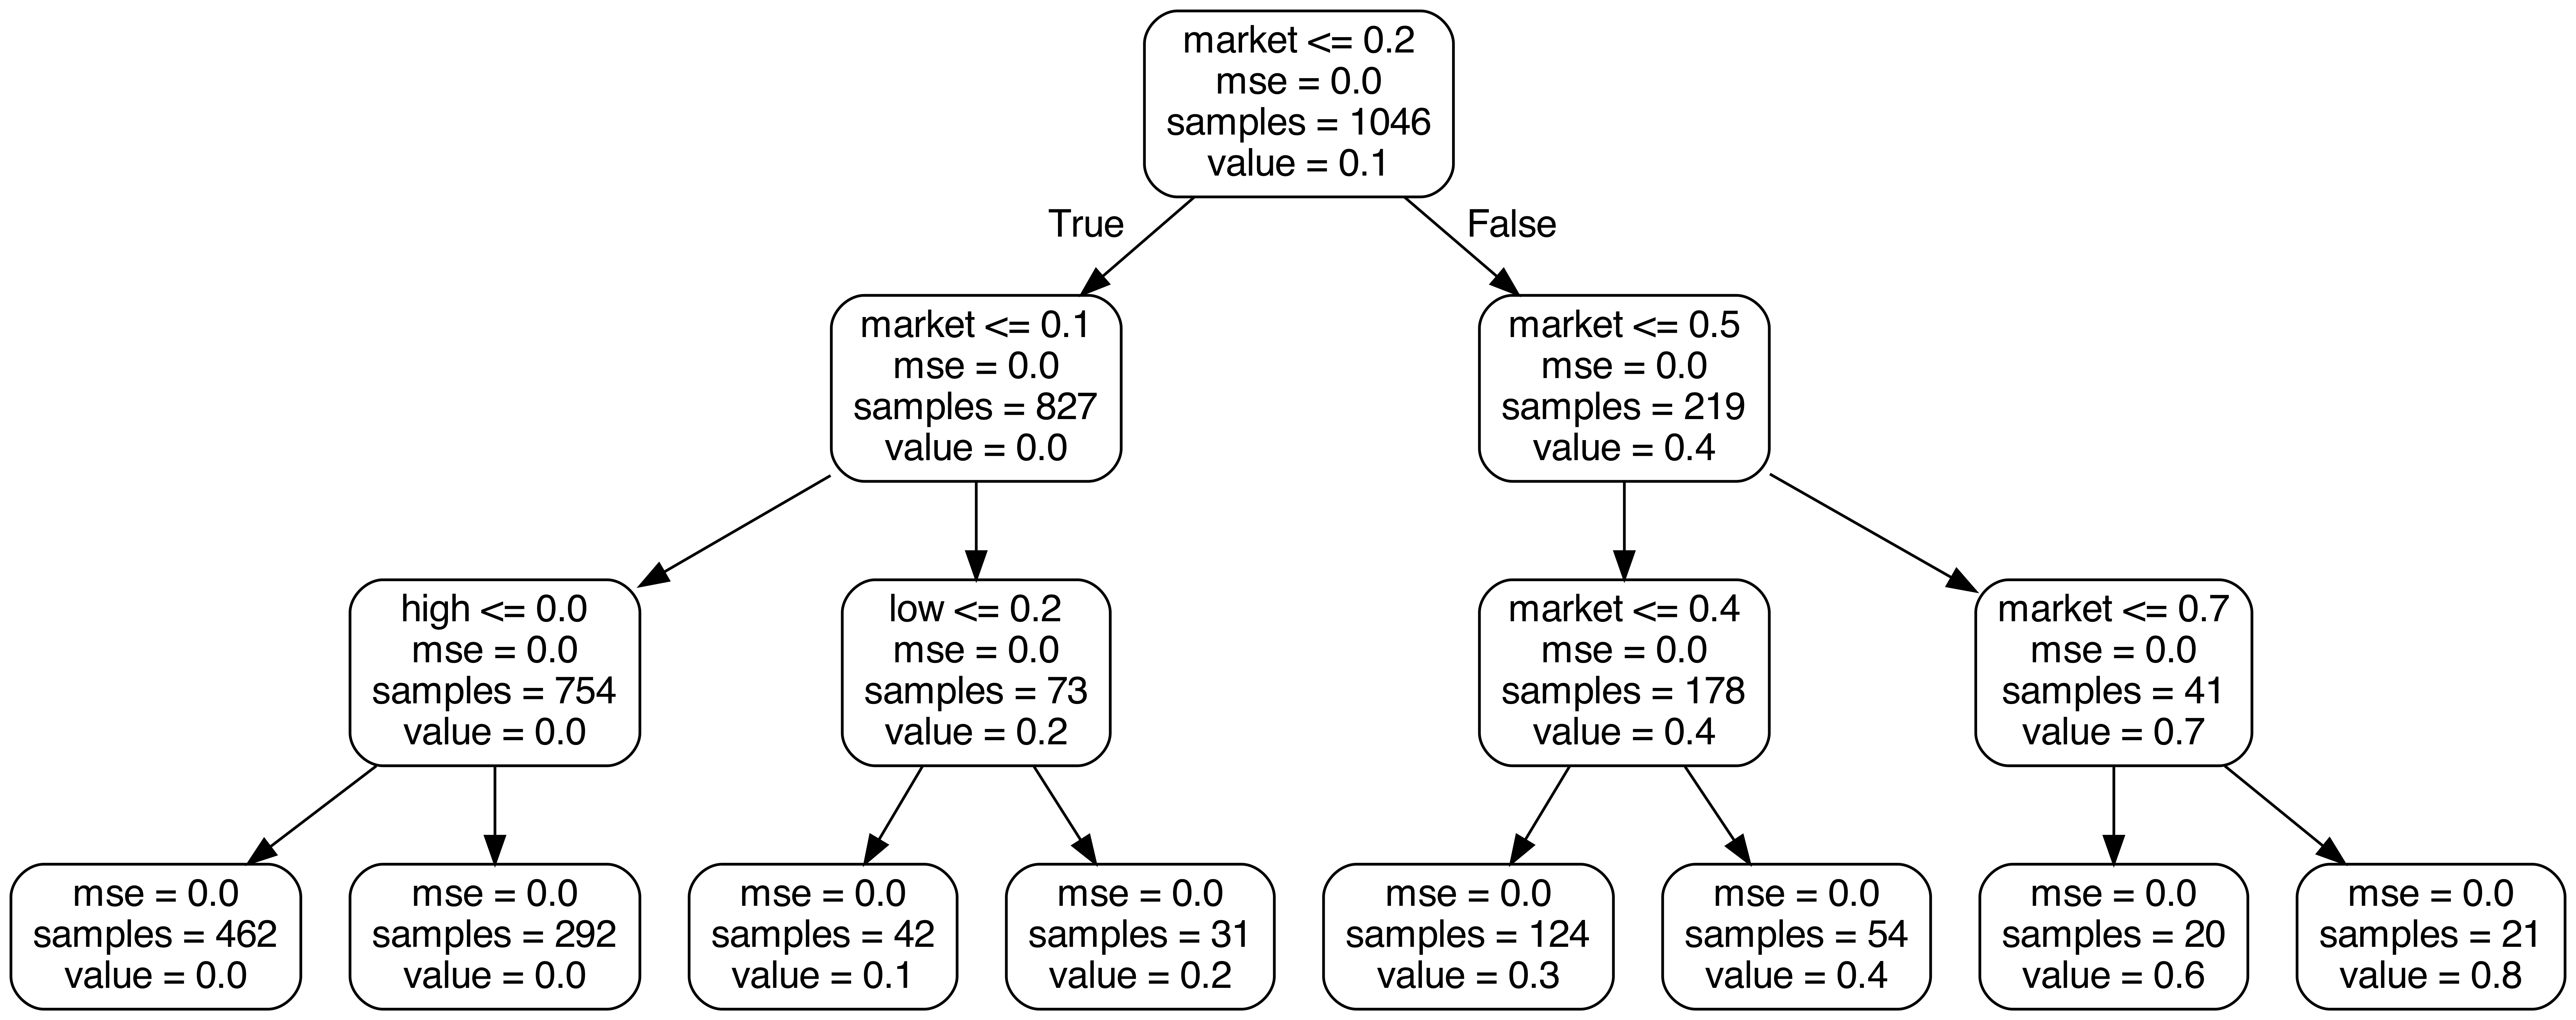

In [249]:
# creating smaller, more visible tree

rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X2_train, y2_train);

tree_small = rf_small.estimators_[5]

export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = features_list, rounded = True, precision = 1)

from subprocess import call
call(['dot', '-Tpng', 'small_tree.dot', '-o', 'small_tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'small_tree.png')

In [250]:
# feature importance to see what features are the most important to the model

# numerical representation of feature importances
importances = list(rf.feature_importances_)

# list of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_list, importances)]

# sort by ascending order
feature_importances = sorted(feature_importances, key = lambda x:x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: market               Importance: 0.46
Variable: low                  Importance: 0.36
Variable: high                 Importance: 0.14
Variable: open                 Importance: 0.04
Variable: ranknow              Importance: 0.0
Variable: year                 Importance: 0.0
Variable: month                Importance: 0.0
Variable: day                  Importance: 0.0
Variable: dayofyear            Importance: 0.0
Variable: weekofyear           Importance: 0.0
Variable: weekday              Importance: 0.0
Variable: quarter              Importance: 0.0
Variable: is_month_start       Importance: 0.0
Variable: is_month_end         Importance: 0.0
Variable: volume               Importance: 0.0
Variable: close_ratio          Importance: 0.0
Variable: spread               Importance: 0.0


Text(0.5, 1.0, 'Feature Importance')

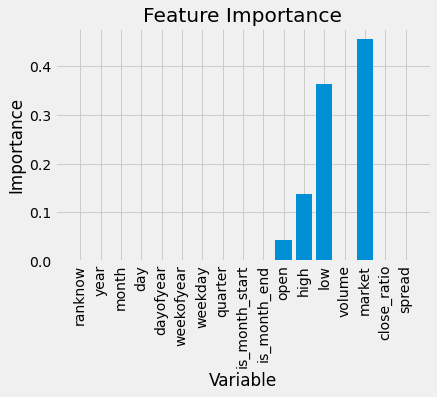

In [251]:
# visualizing the feature importances

plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, features_list, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Feature Importance')